## <span style="color:#0b486b">Part 2: Deep Neural Networks (DNN) </span>

In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full_img, y_train_full), (X_test_img, y_test) = fashion_mnist.load_data() #Insert your code here

In [3]:
num_train = X_train_full_img.shape[0]
num_test = X_test_img.shape[0]
X_train_full =  X_train_full_img.reshape(num_train,-1) #Insert your code here
X_test = X_test_img.reshape(num_test,-1)   #Insert your code here
print(X_train_full.shape, y_train_full.shape)
print(X_test.shape, y_test.shape)

(60000, 784) (60000,)
(10000, 784) (10000,)


In [4]:
import math
N = X_train_full.shape[0]
i = math.floor(0.9*N)
X_train, y_train = X_train_full[:i],y_train_full[:i] #Insert your code here
X_valid, y_valid = X_train_full[i:],y_train_full[i:]#Insert your code here
X_train, X_valid, X_test =X_train/255, X_valid/255, X_test/255 #Insert your code here

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

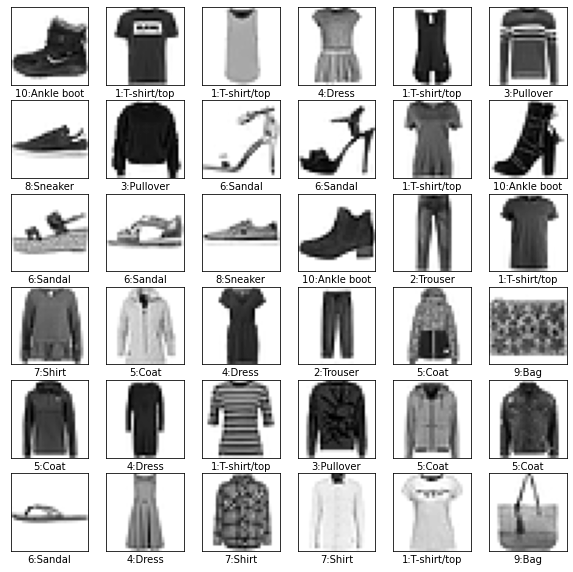

In [6]:
def display_item(images, label, num2display):
    fig = plt.figure(figsize=(10,10))
    for i in range(num2display):
        p = fig.add_subplot(6,6,i+1,xticks=[],yticks=[])
        p.imshow(images[i], cmap=plt.cm.binary)
        plt.xlabel(label[y_train_full[i]])
    plt.show()
label = ["1:T-shirt/top", "2:Trouser", "3:Pullover", "4:Dress", "5:Coat", "6:Sandal", "7:Shirt", "8:Sneaker", "9:Bag", "10:Ankle boot"]
display_item(X_train_full_img,label,36)

In [7]:
import numpy as np
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential

In [8]:
dnn_model = Sequential()
dnn_model.add(Dense(units=20,  input_shape=(784,), activation='relu'))
dnn_model.add(Dense(units=25, activation='relu'))
dnn_model.add(Dense(units=10, activation='softmax'))

In [9]:
dnn_model.build()
dnn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 20)                15700     
_________________________________________________________________
dense_1 (Dense)              (None, 25)                525       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                260       
Total params: 16,485
Trainable params: 16,485
Non-trainable params: 0
_________________________________________________________________


In [10]:
dnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [11]:
history = dnn_model.fit(x=X_train, y=y_train, batch_size=64, epochs=20, validation_data=(X_valid, y_valid))

Epoch 1/20
844/844 [==============================] - 4s 3ms/step - loss: 0.6496 - accuracy: 0.7807 - val_loss: 0.4717 - val_accuracy: 0.8473
Epoch 2/20
844/844 [==============================] - 2s 2ms/step - loss: 0.4445 - accuracy: 0.8449 - val_loss: 0.4360 - val_accuracy: 0.8487
Epoch 3/20
844/844 [==============================] - 2s 2ms/step - loss: 0.4044 - accuracy: 0.8590 - val_loss: 0.4104 - val_accuracy: 0.8550
Epoch 4/20
844/844 [==============================] - 2s 2ms/step - loss: 0.3819 - accuracy: 0.8652 - val_loss: 0.4069 - val_accuracy: 0.8605
Epoch 5/20
844/844 [==============================] - 2s 2ms/step - loss: 0.3633 - accuracy: 0.8702 - val_loss: 0.3733 - val_accuracy: 0.8660
Epoch 6/20
844/844 [==============================] - 2s 3ms/step - loss: 0.3543 - accuracy: 0.8734 - val_loss: 0.3928 - val_accuracy: 0.8612
Epoch 7/20
844/844 [==============================] - 2s 3ms/step - loss: 0.3420 - accuracy: 0.8768 - val_loss: 0.3916 - val_accuracy: 0.8598
Epoch 

In [12]:
dnn_model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3732 - accuracy: 0.8679


[0.373172402381897, 0.867900013923645]

####  <span style="color:red"></span>Tuning hyper-parameters with grid search

In [13]:
def create_model(units_1=20,act_1='relu',act_2='relu'):
    model = Sequential()
    model.add(Dense(units=units_1,  input_shape=(784,), activation=act_1))
    model.add(Dense(units=25, activation=act_2))
    model.add(Dense(units=10, activation='softmax'))
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

In [14]:
#Insert your code here. You can add more cells if necessary
act = ['sigmoid','tanh','relu']
n1=[10,20,30,40]

In [15]:
from sklearn.model_selection import GridSearchCV

In [16]:
act = ['sigmoid','tanh','relu']
n1=[10,20,30,40]
param_grid = dict(units_1=n1,act_1=act,act_2=act)

In [ ]:
for i in range(len(n1)):
    for a in range(len(act)):
        for b in range(len(act)):
            X = tf.keras.layers.Input(shape=(784,)) #declare input layer
            t = Dense(units=n1[i], activation= act[a])(X)
            t = Dense(units=25, activation= act[b])(t)
            t = Dense(units=10, activation= 'softmax')(t)
            dnn_model_hyper_parameters = tf.keras.Model(inputs= X, outputs=t)
            dnn_model_hyper_parameters.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
            dnn_model_hyper_parameters.fit(x= X_train, y= y_train, batch_size= 64, epochs= 5, validation_data = (X_valid, y_valid))
            res = dnn_model_hyper_parameters.evaluate(X_test, y_test)

####  <span style="color:red"></span> Experimenting with temperature-based softmax

In [17]:
tau = [0.1, 0.5, 0.8]
for i in range(len(tau)):
    X = tf.keras.layers.Input(shape=(784,)) #declare input layer
    t = Dense(units=20, activation= 'relu')(X)
    t = Dense(units=25, activation= 'relu')(t)
    t = t/tau[i]
    t = Dense(units=10, activation= 'softmax')(t)
    dnn_model_hyper_parameters = tf.keras.Model(inputs= X, outputs=t)
    dnn_model_hyper_parameters.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    dnn_model_hyper_parameters.fit(x= X_train, y= y_train, batch_size= 64, epochs= 5, validation_data = (X_valid, y_valid))
    res = dnn_model_hyper_parameters.evaluate(X_test, y_test)

Epoch 1/5
844/844 [==============================] - 3s 3ms/step - loss: 0.6515 - accuracy: 0.7710 - val_loss: 0.5031 - val_accuracy: 0.8127
Epoch 2/5
844/844 [==============================] - 2s 3ms/step - loss: 0.4434 - accuracy: 0.8390 - val_loss: 0.4268 - val_accuracy: 0.8513
Epoch 3/5
844/844 [==============================] - 2s 3ms/step - loss: 0.4041 - accuracy: 0.8538 - val_loss: 0.4166 - val_accuracy: 0.8530
Epoch 4/5
844/844 [==============================] - 2s 2ms/step - loss: 0.3856 - accuracy: 0.8610 - val_loss: 0.4118 - val_accuracy: 0.8527
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.4116 - accuracy: 0.8538
Epoch 1/5
844/844 [==============================] - 2s 3ms/step - loss: 0.6238 - accuracy: 0.7824 - val_loss: 0.4640 - val_accuracy: 0.8322
Epoch 2/5
844/844 [==============================] - 2s 2ms/step - loss: 0.4316 - accuracy: 0.8458 - val_loss: 0.4154 - val_accuracy: 0.8500
Epoch 3/5
844/844 [==============================] - 2s